In [524]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='white', context='notebook', palette='deep')

In [525]:
train = pd.read_csv('data/train.csv').drop(columns=['PassengerId'])
train.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

**NULL elements:**

In [526]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**OUTLIERS:**

In [527]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'S': 'S', 'C': 'C', 'Q': 'Q', np.nan: 'C'})
outlier = [258, 679, 737, 159, 180, 201, 324, 792, 846, 863]
train = train.drop(outlier)

In [528]:
train.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  881.000000  881.000000  881.000000  711.000000  881.000000  881.000000   
mean     0.384790    2.307605    0.351873   29.675345    0.465380    0.368899   
std      0.486822    0.835055    0.477826   14.552495    0.883687    0.797088   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   20.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    5.000000    6.000000   

             Fare  
count  881.000000  
mean    30.272544  
std     41.192295  
min      0.000000  
25%      7.895800  
50%     14.454200  
75%     30.500000  
max    263.000000

**STATISTICS:**

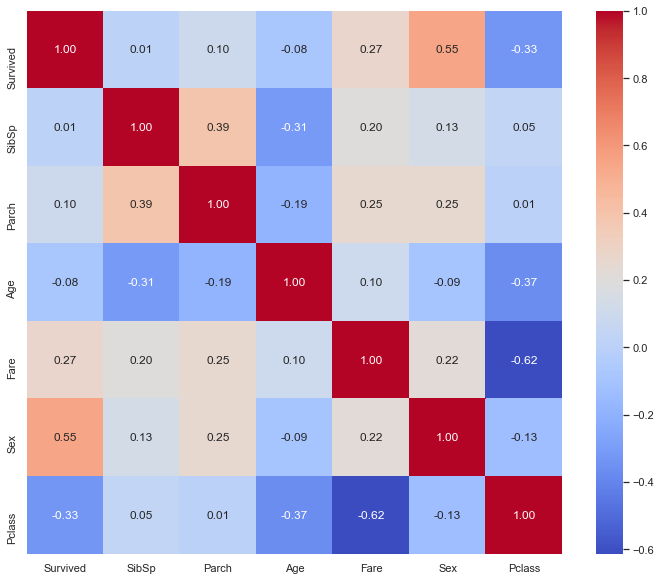

In [529]:
plt.figure(figsize=(12, 10))
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare', 'Sex', 'Pclass']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [530]:
g = sns.FacetGrid(train, col='Survived', height=6)
g.map(sns.distplot, 'Age')
plt.show()

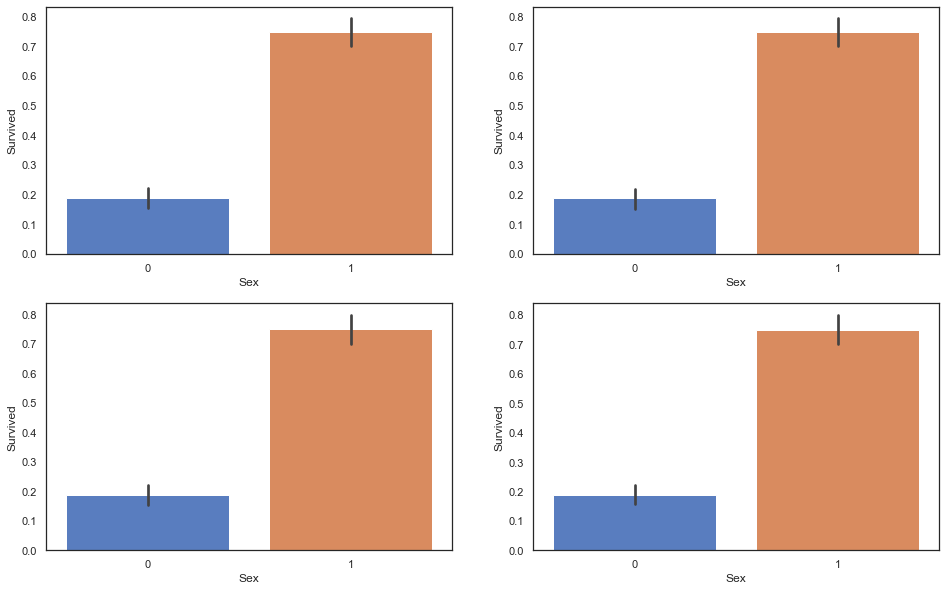

In [531]:
fg, axs = plt.subplots(2, 2, figsize=(16, 10))
sns.barplot(x='Sex', y='Survived', data=train, palette = "muted", ax=axs[0, 0])
sns.barplot(x='Sex', y='Survived', data=train, palette = "muted", ax=axs[0, 1])
sns.barplot(x='Sex', y='Survived', data=train, palette = "muted", ax=axs[1, 0])
sns.barplot(x='Sex', y='Survived', data=train, palette = "muted", ax=axs[1, 1])

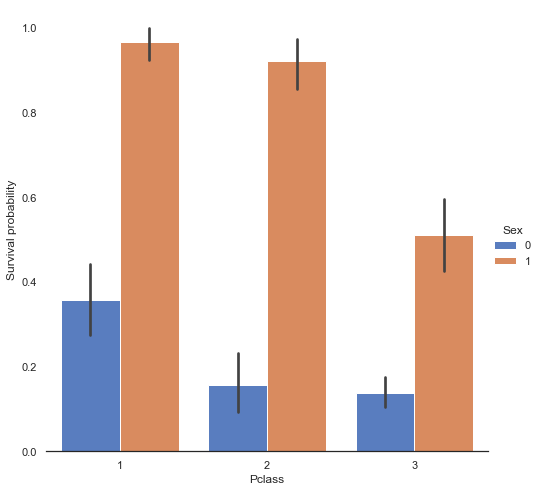

In [532]:
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar', palette = "muted", height=7)
g.despine(left=True)
g.set_ylabels('Survival probability')
plt.show()

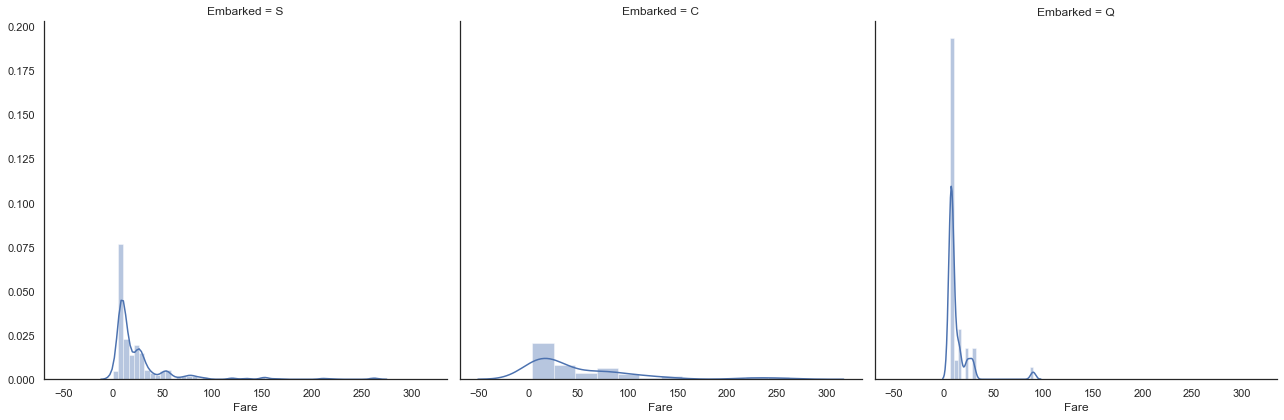

In [533]:
g = sns.FacetGrid(train, col='Embarked', height=6)
g.map(sns.distplot, 'Fare')
plt.show()

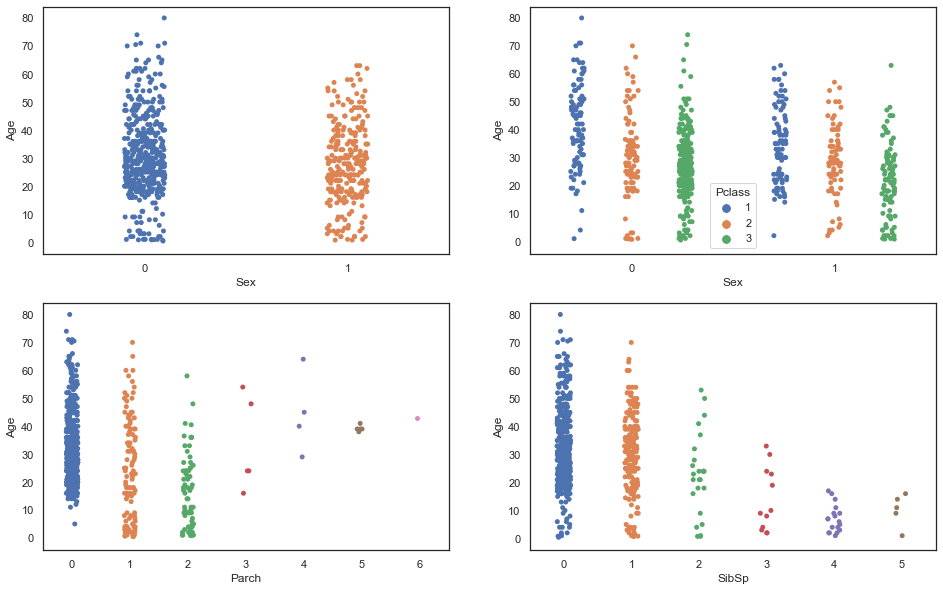

In [534]:
fg, axs = plt.subplots(2, 2, figsize=(16, 10))
sns.stripplot(y='Age', x='Sex', data=train, ax=axs[0, 0])
sns.stripplot(y='Age', x='Sex', hue="Pclass", data=train, dodge=True, ax=axs[0, 1])
sns.stripplot(y='Age', x="Parch", data=train, ax=axs[1, 0])
sns.stripplot(y='Age', x="SibSp", data=train, ax=axs[1, 1])

**AGE:**

In [535]:
age_nan_id_list = list(train.index[train['Age'].isna()])
for i in age_nan_id_list:
    pclass = train.loc[i, 'Pclass']
    parch  = train.loc[i, 'Parch']
    sibsp  = train.loc[i, 'SibSp']
    tmp = train.loc[(train['Pclass'] == pclass) & (train['Parch'] == parch) & (train['SibSp'] == sibsp)]['Age']
    train.at[i, 'Age'] = tmp.median()

**CABIN:**

In [536]:
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ], index=train.index)

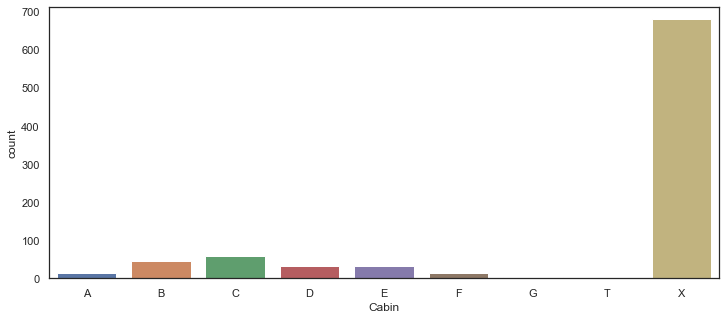

In [537]:
plt.figure(figsize=(12, 5))
sns.countplot(train['Cabin'], order=['A','B','C','D','E','F','G','T','X'])
plt.show()

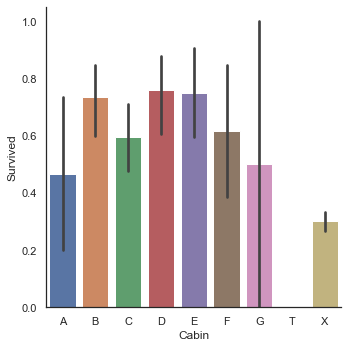

In [538]:
sns.catplot(y="Survived",x="Cabin",data=train,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
plt.show()

**NAMES:**

In [539]:
train['Name'] = pd.Series([i.split(',')[1].split('.')[0].strip() for i in train['Name']], index=train.index)
train['Name'] = train['Name'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir',
                                       'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer'], 'Rare')
train['Name'] = train['Name'].map({'Master': 'Master', 'Mr': 'Mr', 'Mrs': 'Ms',
                                   'Miss': 'Ms', 'Mme': 'Ms', 'Ms': 'Ms', 'Rare': 'Rare'})

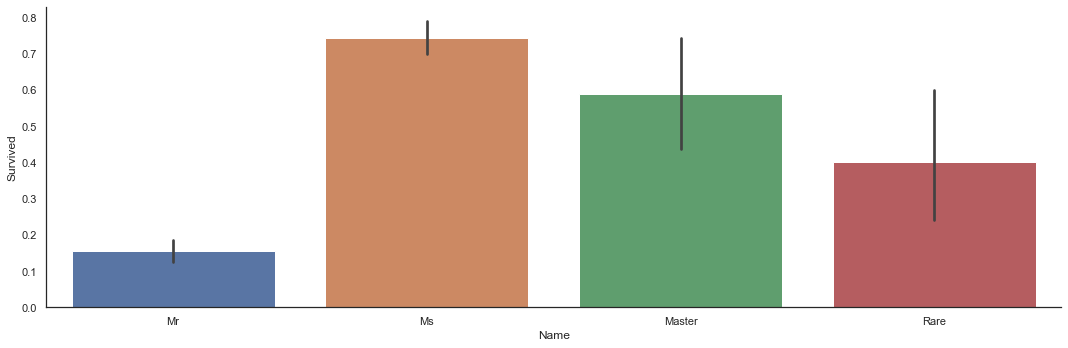

In [540]:
sns.catplot(x='Name', y='Survived', data=train, kind='bar', aspect=3, height=5)

**TICKETS:**

In [541]:
train

Survived  Pclass  Name  Sex   Age  SibSp  Parch            Ticket  \
0           0       3    Mr    0  22.0      1      0         A/5 21171   
1           1       1    Ms    1  38.0      1      0          PC 17599   
2           1       3    Ms    1  26.0      0      0  STON/O2. 3101282   
3           1       1    Ms    1  35.0      1      0            113803   
4           0       3    Mr    0  35.0      0      0            373450   
..        ...     ...   ...  ...   ...    ...    ...               ...   
886         0       2  Rare    0  27.0      0      0            211536   
887         1       1    Ms    1  19.0      0      0            112053   
888         0       3    Ms    1  13.5      1      2        W./C. 6607   
889         1       1    Mr    0  26.0      0      0            111369   
890         0       3    Mr    0  32.0      0      0            370376   

        Fare Cabin Embarked  
0     7.2500     X        S  
1    71.2833     C        C  
2     7.9250     X        S  
3    53.1000     C        S  
4     8.0500     X        S  
..       ...   ...      ...  
886  13.0000     X        S  
887  30.0000     B        S  
888  23.4500     X        S  
889  30.0000     C        C  
890   7.7500     X        Q  

[881 rows x 11 columns]

In [345]:
np.array([True, False, True]) & np.array([False, True, True])

array([False, False,  True])

In [346]:
data_train.iloc[27,:]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                        19
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                      263
Cabin                             C23 C25 C27
Embarked                                    S
Name: 27, dtype: object

In [347]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [348]:
target = data_train['Survived']

data = data_train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
data['Sex'][data['Sex'] == 'male'] = 0
data['Sex'][data['Sex'] == 'female'] = 1
# data['Age'][data['Age'].isna()] = data['Age'].mean(skipna=True)

data = data.to_numpy(dtype=float)
data = (data - data.mean(axis=0)) / data.std(axis=0)

C:\Users\valeryi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\valeryi\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\valeryi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [349]:
model = LogisticRegression(C=1)

In [350]:
model = LogisticRegression(C=1)
cross_val_score(model, data, target, cv=5)

array([0.80446927, 0.80337079, 0.78089888, 0.76966292, 0.81460674])

In [351]:
cross_val_score?

In [352]:
data

array([[ 0.82737724, -0.73769513,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  1.35557354,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724,  1.35557354, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.73769513, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724, -0.73769513, -0.4745452 , -0.47367361, -0.49237783]])

In [353]:
data_test = pd.read_csv('data/test.csv')
data_test.isna().sum()
TEST = data_test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
TEST['Fare'][TEST['Fare'].isna()] = data_train['Fare'].mean()

TEST['Sex'][TEST['Sex'] == 'male'] = 0
TEST['Sex'][TEST['Sex'] == 'female'] = 1

TEST = TEST.to_numpy(dtype=float)
TEST = (TEST - TEST.mean(axis=0)) / TEST.std(axis=0)

C:\Users\valeryi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\valeryi\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\valeryi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\valeryi\

In [354]:
model = LogisticRegression()
model.fit(data, target)
print(cross_val_score(model, data, target, cv=5))
y_pred = model.predict(TEST)

ans = pd.DataFrame({'PassengerId':data_test['PassengerId'], 'Survived': y_pred}).set_index('PassengerId')
ans.to_csv('result_2.csv')

[0.80446927 0.80337079 0.78089888 0.76966292 0.81460674]


In [355]:
data

array([[ 0.82737724, -0.73769513,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  1.35557354,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724,  1.35557354, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.73769513, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724, -0.73769513, -0.4745452 , -0.47367361, -0.49237783]])

In [356]:
ans

Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]